In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


**reading the file**

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

checking the data 

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe

<bound method NDFrame.describe of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

     

In [5]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [6]:
df['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

# #checking for null values and duplicate values and handling them if any

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.duplicated().sum()

127

In [9]:
df = df.drop_duplicates()

# encoding categorical variable

In [10]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)


/tmp/ipykernel_20/2947262224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)


# checking correlation between variables

In [11]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


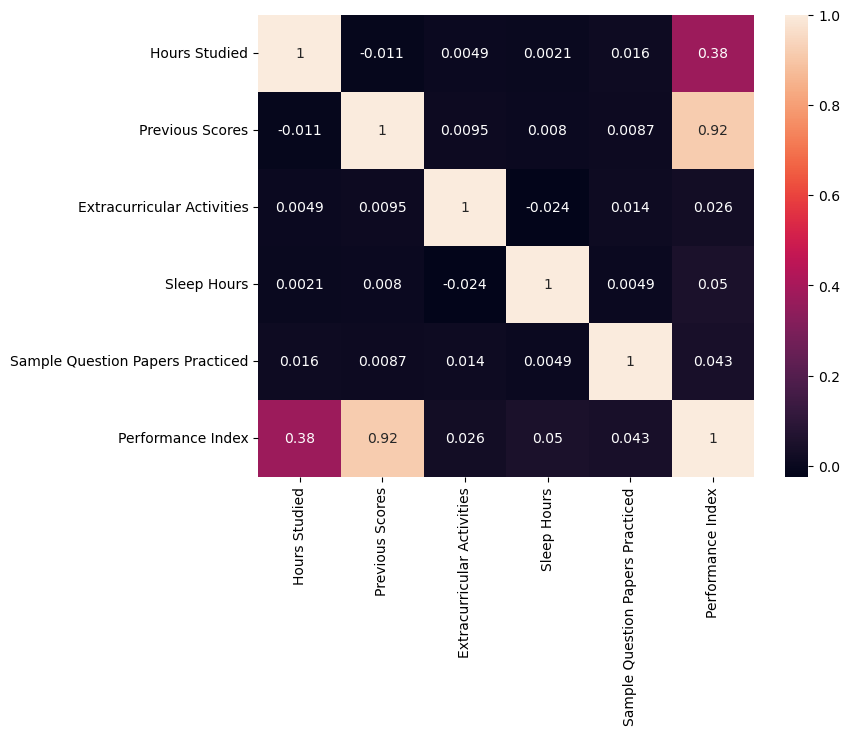

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [15]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [16]:
var = ['Hours Studied',  'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']

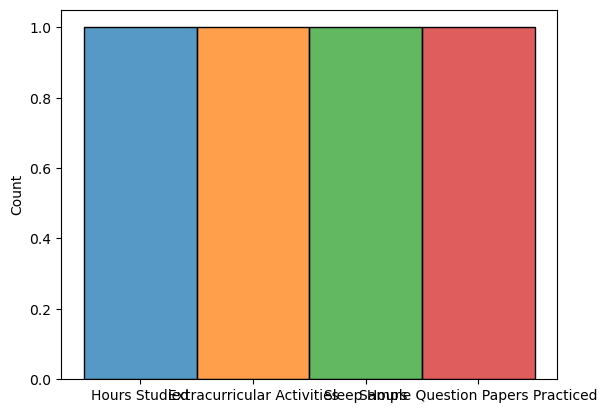

In [17]:
for i in var:
    sns.histplot(i)

# extracting the independent and dependent variable


In [18]:
x = df.drop('Performance Index', axis =1)
y = df['Performance Index']

In [19]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

**splitting into training and testing the data**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.75,test_size = 0.25, random_state = 1234)

In [22]:
x_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
177,5,81,1,5,7
6426,3,98,0,6,4
6671,7,54,1,5,6
4134,2,76,0,7,1
6327,1,71,0,5,1


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred_test = lr.predict(x_test)

In [27]:
y_pred_test

array([35.51897919, 44.25762017, 83.54472984, ..., 55.65659248,
       46.00819476, 55.07386075])

In [28]:
y_pred_train = lr.predict(x_train)

**now we are doing evaluation**

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

R-squared (R2)

Adjusted R-squared

In [29]:
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
test_mse = mean_squared_error(y_test,y_pred_test)
train_mse = mean_squared_error(y_train,y_pred_train)

In [31]:
print('testing data mse:',test_mse)
print('training data mse:',train_mse)

testing data mse: 4.321875441560404
training data mse: 4.129920440241684


In [32]:
r_square_train = r2_score(y_train,y_pred_train)
r_square_test = r2_score(y_test,y_pred_test)

In [33]:
print('accuracy of training data',r_square_train)
print('accuracy of testing data:',r_square_test)

accuracy of training data 0.9888594400309599
accuracy of testing data: 0.9881072267801202


r2_sqaure value of testing and training so we cann say that our model is generalised